# Comparing stock performance

Stock price series: hard to compare @ different levels. Simple solution:
- normalize price series to start @ 100
- divide all prices by first in series
- multiply by 100


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
google = pd.read_csv('data/stock_data/google.csv',
                     parse_dates=['Date'],
                     infer_datetime_format=True,
                     index_col='Date')

google.head(3)

Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-04     NaN

In [3]:
# select first element
first = google.Close.iloc[0]
first

556.0

In [4]:
# normalize a single series
normalized = google.Close.div(first).mul(100)
normalized

Date
2014-01-02    100.000000
2014-01-03     99.271583
2014-01-04           NaN
2014-01-05           NaN
2014-01-06    100.377698
                 ...    
2016-12-26           NaN
2016-12-27    142.365108
2016-12-28    141.196043
2016-12-29    140.789568
2016-12-30    138.816547
Name: Close, Length: 1094, dtype: float64

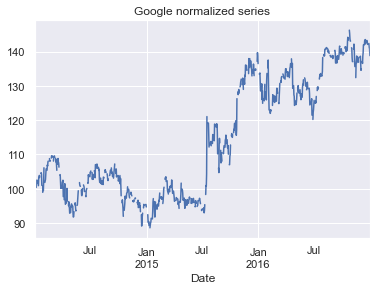

In [5]:
# plot
normalized.plot(title='Google normalized series')
plt.show()

##

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


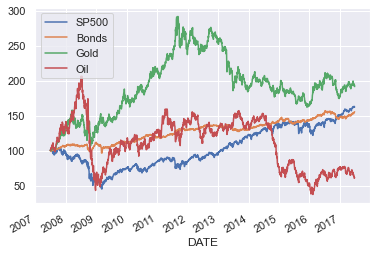

In [6]:
# Import data here
prices = pd.read_csv('data/stock_data/asset_classes.csv',
                     parse_dates=['DATE'],
                     index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()

### Comparing stock prices with a benchmark

You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


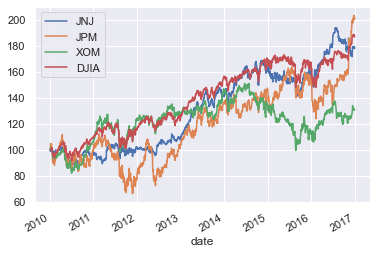

In [7]:
# Import stock prices and index here
stocks = pd.read_csv('data/stock_data/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('data/stock_data/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
normalized = data.div(data.iloc[0]).mul(100).plot()
plt.show()

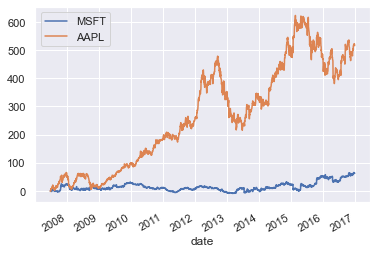

In [8]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('data/stock_data/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('data/stock_data/sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

### Sampling data

In [9]:
dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1, 5)

quarterly = pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [11]:
monthly = quarterly.asfreq('M')
monthly

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

### Convert monthly to weekly data

In [12]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start,
                              end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(index=monthly_dates, data=[1, 2])
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start,
                              end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


            Unemployment
date                    
2010-01-03           NaN
2010-01-10           NaN
2010-01-17           NaN
2010-01-24           NaN
2010-01-31           NaN
            Unemployment
date                    
2010-01-03           9.8
2010-01-10           9.8
2010-01-17           9.8
2010-01-24           9.8
2010-01-31           9.8
            Unemployment
date                    
2010-01-03           9.8
2010-01-10           9.8
2010-01-17           9.8
2010-01-24           9.8
2010-01-31           9.8


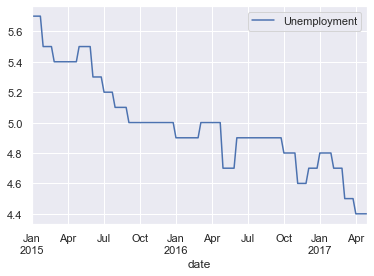

In [13]:
# Import data here
data = pd.read_csv('data/stock_data/debt_unemployment.csv',
                   parse_dates=['date'], index_col='date')
data.drop('Debt/GDP', axis='columns', inplace=True)

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here
weekly_ffill.loc['2015':].plot()
plt.show()